In [10]:
import pandas as pd


data = pd.read_csv("US_Accidents_March23.csv", nrows=200000)

data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

print("Dataset shape:", data.shape)
data.head()


Dataset shape: (200000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


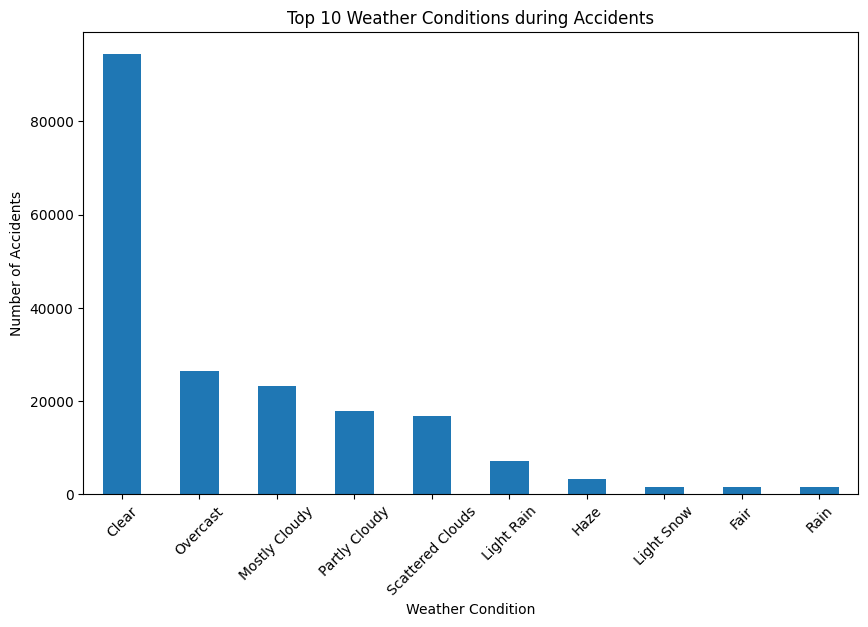

In [11]:
import matplotlib.pyplot as plt

road_conditions = data['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,6))
road_conditions.plot(kind='bar')
plt.title("Top 10 Weather Conditions during Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


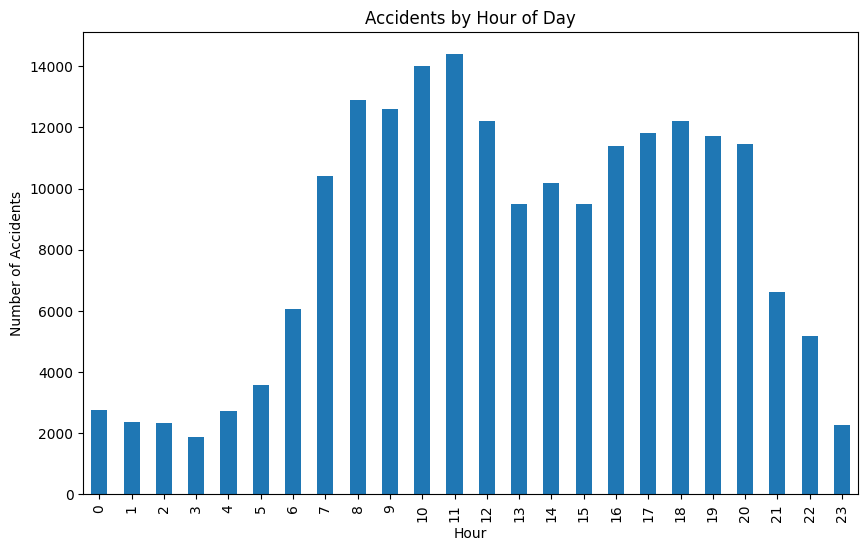

In [12]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['Hour'] = data['Start_Time'].dt.hour

plt.figure(figsize=(10,6))
data['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


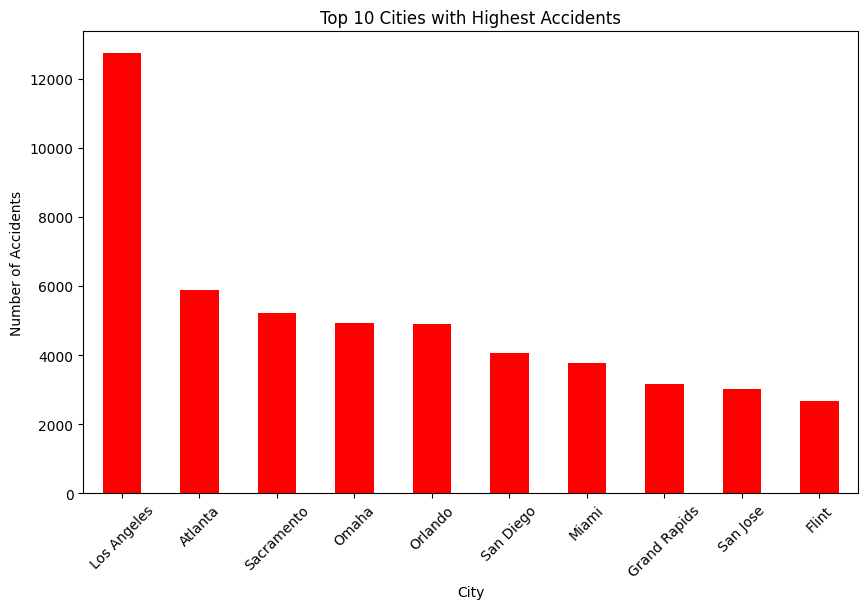

In [13]:
city_counts = data['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color='red')
plt.title("Top 10 Cities with Highest Accidents")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


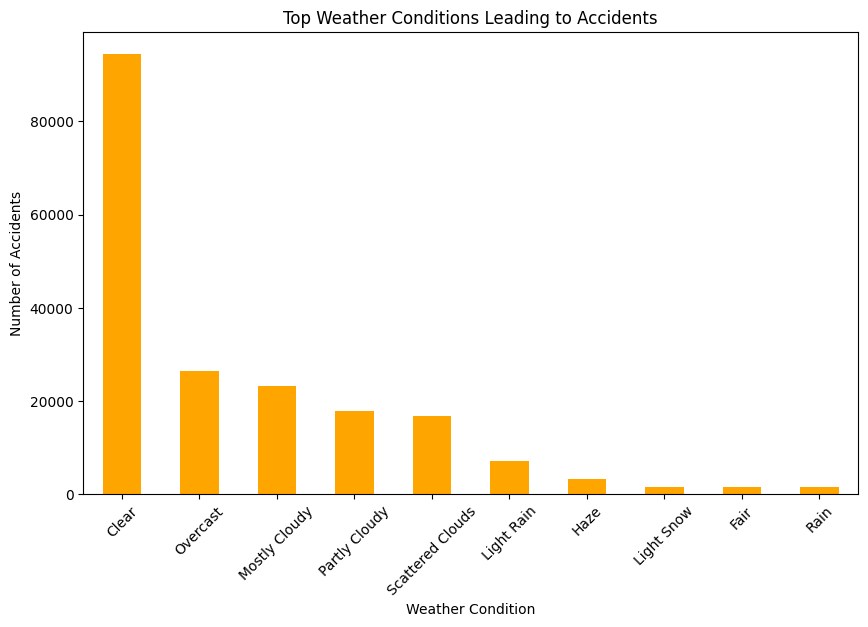

In [14]:
weather = data['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,6))
weather.plot(kind='bar', color='orange')
plt.title("Top Weather Conditions Leading to Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


In [15]:
print("Most common weather condition:", data['Weather_Condition'].mode()[0])
print("City with most accidents:", data['City'].mode()[0])
print("Peak accident hour:", data['Hour'].mode()[0])


Most common weather condition: Clear
City with most accidents: Los Angeles
Peak accident hour: 11


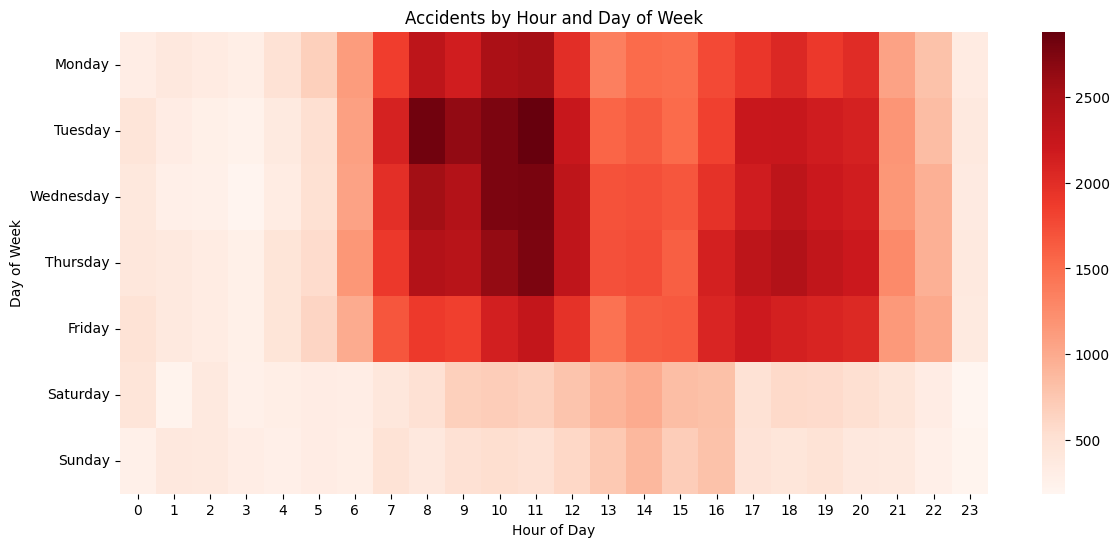

In [16]:
import seaborn as sns

data['Hour'] = data['Start_Time'].dt.hour
data['DayOfWeek'] = data['Start_Time'].dt.day_name()

heatmap_data = data.pivot_table(index='DayOfWeek', columns='Hour', values='ID', aggfunc='count')


days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds")
plt.title("Accidents by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
